In [5]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter("ignore")
from src.myFun import SoilRoot, InitialState, f_PM_hydraulics

In [16]:

# Site-specific input data and parameters
inpath = '/Users/quan/projects/MySkill/model_data_fusion/Input/'
sitename = 'US-Me2'
soil_texture = 2; root_type = 4
root_depth = 2; canopy_height = 33; tower_height = 47 # in meters
nobsinaday = 1 #48 # number of observations per day
warmup = 60 # warmup period, days

# df = pd.read_csv(sitename+'.csv')
df = pd.read_csv(inpath+sitename+'.csv')
SRparas = SoilRoot(soil_texture,root_type,root_depth,canopy_height,tower_height,24*3600/nobsinaday,1,0)
Init = InitialState(-0.05,-0.1,-0.2,-0.1,df['SOILM'][0],df['SOILM'][0])


# Parameters estimated using MCMC, one sample
gpmax = 3900 # maximum xylem conductance, 10^-9 m/s/MPa
p50 = -5.86 # psi_50, MPa
aa = 4.53 # shape parameter of vulnerability curve, unitless
lww = 6255 # marginal water use efficiency under a well-watered condition # umol/mol
b0 = -1.28 # sensitivity of MWUE to leaf water potential, /MPa
soil_b = 0.62 # calibration coefficient for soil hydraulic parameter, unitless
boundary_cond = 0.253 # boundary condition of the second soil layer, in volumnetric water content
theta = [gpmax,p50,aa,lww,b0,0,soil_b,boundary_cond] # in the same order of outputs from AMIS.py and AMIS_PT.py

ET,PSIL = f_PM_hydraulics(df,SRparas,theta)

In [20]:
df

,Year,MonthDay,DOY,TEMP,Rad,SOILM,VPD,P,RNET,ET,NEE,GPP,ET.1,SOILM2,LAI,Vegk,GA,GA_U,GSOIL
0,2002,101,0.0,2.554,11.900,40.721,2.469,4.863,6.383,5.925,2.435,-0.567,5.925,40.721,6.2,1,1,1,1
1,2002,102,1.0,2.814,34.461,46.017,2.133,1.902,3.190,18.601,1.514,0.841,18.601,46.017,6.2,1,1,1,1
2,2002,103,2.0,-1.488,63.140,43.098,1.799,0.056,-4.810,10.696,0.718,1.433,10.696,43.098,6.2,1,1,1,1
3,2002,104,3.0,-0.173,50.927,41.387,2.763,0.000,2.913,4.123,0.889,1.139,4.123,41.387,6.2,1,1,1,1
4,2002,105,4.0,3.422,27.712,40.808,3.290,2.455,28.194,5.295,0.700,1.691,5.295,40.808,6.2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,2014,1227,360.0,-0.696,15.393,32.038,1.866,3.736,-0.419,15.159,-0.288,1.888,15.159,32.038,6.2,1,1,1,1
4741,2014,1228,361.0,-0.244,22.305,31.902,1.667,3.740,6.540,36.640,-0.688,2.086,36.640,31.902,6.2,1,1,1,1
4742,2014,1229,362.0,-3.946,35.885,31.642,1.891,2.573,-4.208,17.985,0.632,0.272,17.985,31.642,6.2,1,1,1,1
4743,2014,1230,363.0,-11.891,90.485,31.400,1.929,0.000,2.938,9.733,-0.830,1.241,9.733,31.400,6.2,1,1,1,1


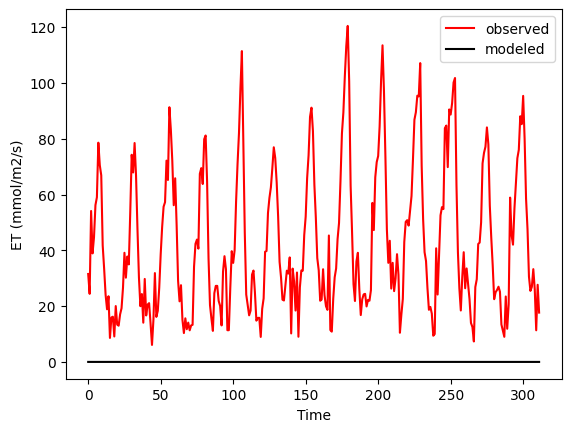

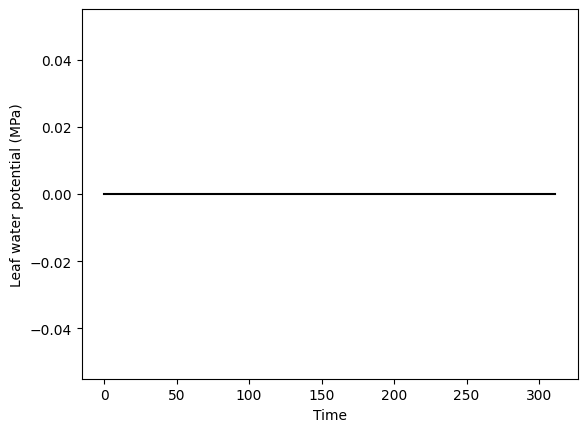

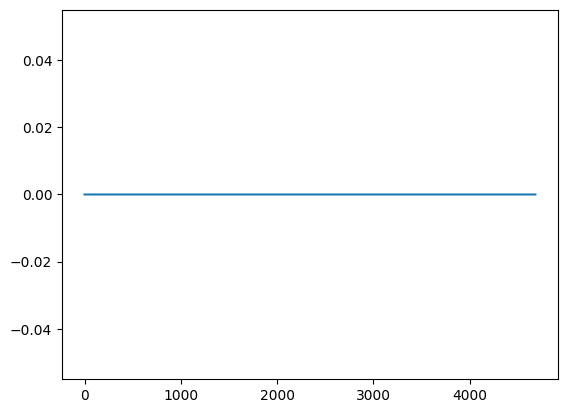

In [19]:
#%%
import matplotlib.pyplot as plt
from src.myFun import dailyAvg

plt.figure()
plt.plot(dailyAvg(df['ET'][warmup*nobsinaday:],nobsinaday*15),'-r',label='observed')
plt.plot(dailyAvg(ET[warmup*nobsinaday:]*1e3,nobsinaday*15),'-k',label='modeled')
plt.xlabel('Time')
plt.ylabel('ET (mmol/m2/s)')
plt.legend()

plt.figure()
plt.plot(dailyAvg(PSIL[warmup*nobsinaday:],nobsinaday*15),'-k')
plt.xlabel('Time')
plt.ylabel('Leaf water potential (MPa)')

plt.figure()
plt.plot(PSIL[warmup*nobsinaday:])
